In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

## Data


In [2]:
# X, y = make_classification(n_samples=200, 
#                            n_features=4, 
#                            random_state=42)

# # X, y = load_breast_cancer(return_X_y=True)
X, y  = make_blobs(n_samples=200, 
                   n_features=2, 
                   centers=2, 
                   cluster_std=1.05, 
                   random_state=40)
X.shape, y.shape

((200, 2), (200,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

## SVM algorithm

In [4]:
# Hyper Parameters
epochs = 1000
lr = 1e-3
lambda_parameter = 1e-1 # Regulariztion value

In [5]:
class SVM :
    def __init__(self, lr, lambda_param, n_iters):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                condition = y_[i] * (np.dot(x_i, self.weight) - self.bias) >= 1
                if condition:
                    self.weight -= self.lr * (2 * self.lambda_param * self.weight)
                else:
                    self.weight -= self.lr * (2 * self.lambda_param * self.weight - np.dot(x_i, y_[i]))

                    self.bias -= self.lr  * y[i]

        print("Fitted")

    def predict(self, X):
        probs = np.dot(X, self.weight) - self.bias
        return np.sign(probs)

In [24]:
i, y = zip(*enumerate(X))
y[:10]

(array([-2.95136139, -8.80728994]),
 array([ 5.59214382, -4.57450616]),
 array([ 4.04605258, -5.41993342]),
 array([-1.81294631, -7.55640734]),
 array([-3.21400802, -9.06784616]),
 array([-1.72604505, -8.80021267]),
 array([-1.61039388, -8.55949367]),
 array([ 6.13492636, -4.734233  ]),
 array([-3.01392766, -8.91441712]),
 array([ 5.52543381, -4.38710808]))

In [6]:
classifier = SVM(lr=lr, 
                 lambda_param=lambda_parameter, 
                 n_iters=epochs)
# classifier.fit(X_train, y_train)
classifier.fit(X, y)

Fitted


In [10]:
# classifier.predict(X_test)

In [10]:
print(classifier.weight, classifier.bias)

[0.24146868 0.50560654] -3.0849999999997713


## Plot

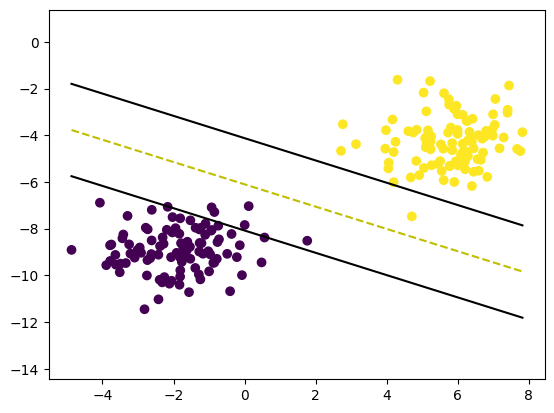

In [65]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, classifier.weight, classifier.bias, 0)
x1_2 = get_hyperplane_value(x0_2, classifier.weight, classifier.bias, 0)

x1_1_m = get_hyperplane_value(x0_1, classifier.weight, classifier.bias, -1)
x1_2_m = get_hyperplane_value(x0_2, classifier.weight, classifier.bias, -1)

x1_1_p = get_hyperplane_value(x0_1, classifier.weight, classifier.bias, 1)
x1_2_p = get_hyperplane_value(x0_2, classifier.weight, classifier.bias, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()